## Can we predict that small or medium enterprises (SME) are likely to face financial distress 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_fscore_support,
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
)
import joblib

In [38]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [39]:
df.shape 

(6819, 96)

In [40]:
print("Target distribution:")
print(df['Bankrupt?'].value_counts())
print("Proportions:")
print(df['Bankrupt?'].value_counts(normalize=True))

Target distribution:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Proportions:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [42]:
df_clean = df.copy()
df_clean.columns = [c.strip().replace(" ", "_").replace("'", "").replace("(", "").replace(")", "") for c in df_clean.columns]
df_clean

,Bankrupt?,ROAC_before_interest_and_depreciation_before_interest,ROAA_before_interest_and_%_after_tax,ROAB_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,...,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholders_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [44]:
target_col = "Bankrupt?"
if target_col not in df_clean.columns:
    target_col = "Bankrupt?"
y = df_clean[target_col].astype(int)

In [45]:
X = df_clean.drop(columns=[target_col])
print("Features shape:", X.shape)
X.columns[:20]

Features shape: (6819, 95)


Index(['ROAC_before_interest_and_depreciation_before_interest',
       'ROAA_before_interest_and_%_after_tax',
       'ROAB_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
       'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate',
       'After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_after_tax', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest-bearing_debt_interest_rate', 'Tax_rate_A',
       'Net_Value_Per_Share_B', 'Net_Value_Per_Share_A',
       'Net_Value_Per_Share_C', 'Persistent_EPS_in_the_Last_Four_Seasons',
       'Cash_Flow_Per_Share'],
      dtype='object')

In [8]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

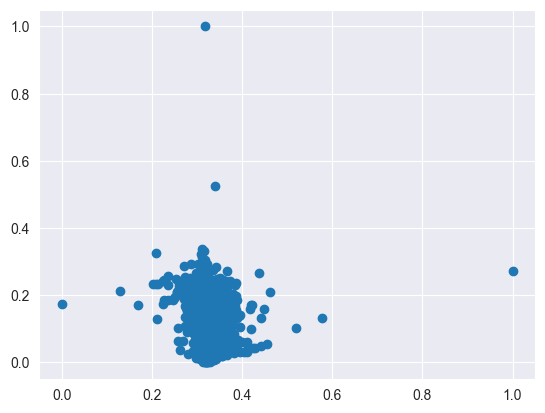

In [30]:
plt.scatter(df[' Cash Flow Per Share'],df[' Debt ratio %'])

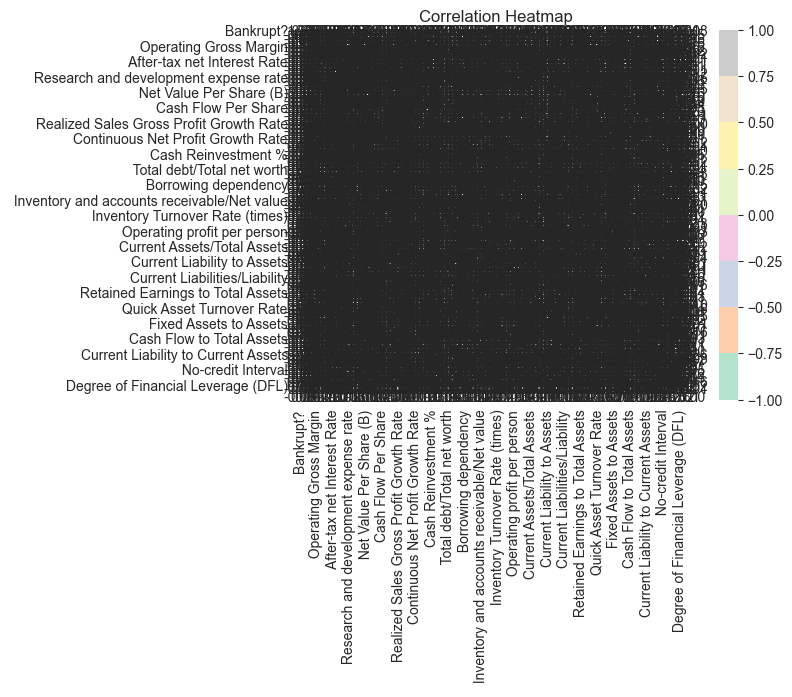

In [35]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Train and test split

In [46]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))

Train: (5455, 95) Test: (1364, 95)
Train target distribution:
 Bankrupt?
0    0.967736
1    0.032264
Name: proportion, dtype: float64


In [47]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="liblinear", class_weight="balanced", random_state=RANDOM_STATE))
])


In [48]:
pipe_lr.fit(X_train, y_train)

# Predict & evaluate on test
y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", precision_recall_fscore_support(y_test, y_pred, average="binary"))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8804985337243402
Precision: 0.18848167539267016
Recall: 0.8181818181818182
F1: (0.18848167539267016, 0.8181818181818182, 0.30638297872340425, None)
ROC AUC: 0.918388429752066


In [49]:
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.31        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364

Confusion matrix:
 [[1165  155]
 [   8   36]]


In [50]:
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight="balanced")
rf_pipe = Pipeline([("scaler", StandardScaler()), ("rf", rf)])  # scaling not strictly needed for RF but harmless
rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)
y_proba_rf = rf_pipe.predict_proba(X_test)[:, 1]

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF Precision:", precision_score(y_test, y_pred_rf, zero_division=0))
print("RF Recall:", recall_score(y_test, y_pred_rf, zero_division=0))
print("RF F1:", precision_recall_fscore_support(y_test, y_pred_rf, average="binary"))
print("RF ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("RF Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

RF Accuracy: 0.9699413489736071
RF Precision: 0.6363636363636364
RF Recall: 0.1590909090909091
RF F1: (0.6363636363636364, 0.1590909090909091, 0.2545454545454545, None)
RF ROC AUC: 0.9452479338842974
RF Confusion matrix:
 [[1316    4]
 [  37    7]]


In [51]:
coeffs = pipe_lr.named_steps['clf'].coef_[0]
coef_df = pd.DataFrame({"feature": X.columns, "coef": coeffs})
coef_df = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index)
print(coef_df.head(15))


                                        feature      coef
18      Persistent_EPS_in_the_Last_Four_Seasons -2.268296
90                          Liability_to_Equity -1.811768
39                         Borrowing_dependency  1.643905
94                          Equity_to_Liability -1.615916
32                                Current_Ratio -1.518077
85                   Net_Income_to_Total_Assets -1.276768
45                 Accounts_Receivable_Turnover -1.226217
15                        Net_Value_Per_Share_B -1.216578
35                   Total_debt/Total_net_worth  0.933537
1          ROAA_before_interest_and_%_after_tax  0.931203
41             Operating_profit/Paid-in_capital  0.877432
37                             Net_worth/Assets -0.858445
36                                 Debt_ratio_%  0.858445
43  Inventory_and_accounts_receivable/Net_value -0.795694
80                       Cash_Flow_to_Liability -0.787184


In [52]:
importances = rf.feature_importances_
imp_df = pd.DataFrame({"feature": X.columns, "importance": importances})
imp_df = imp_df.sort_values("importance", ascending=False).head(15)
print("\nTop RF importances:\n", imp_df)


Top RF importances:
                                               feature  importance
39                               Borrowing_dependency    0.058760
85                         Net_Income_to_Total_Assets    0.048597
18            Persistent_EPS_in_the_Last_Four_Seasons    0.044632
94                                Equity_to_Liability    0.037868
37                                   Net_worth/Assets    0.033284
68                         Total_income/Total_expense    0.032327
36                                       Debt_ratio_%    0.031539
67                  Retained_Earnings_to_Total_Assets    0.030559
9                  Continuous_interest_rate_after_tax    0.029895
42              Net_profit_before_tax/Paid-in_capital    0.029233
7                         After-tax_net_Interest_Rate    0.027833
90                                Liability_to_Equity    0.027605
0   ROAC_before_interest_and_depreciation_before_i...    0.023788
34                             Interest_Expense_Ratio 

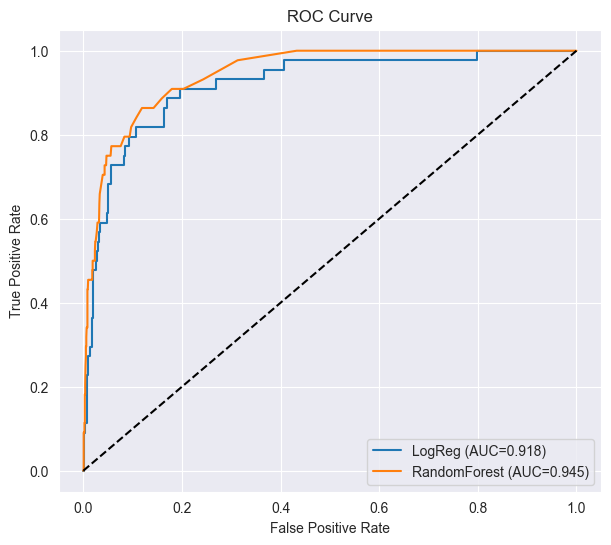

In [53]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc_score(y_test, y_proba):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={roc_auc_score(y_test, y_proba_rf):.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [54]:
joblib.dump(pipe_lr, "logistic_baseline_pipeline.joblib")
# or save RF
joblib.dump(rf_pipe, "rf_baseline_pipeline.joblib")
print("Saved model files.")

Saved model files.


In [56]:
model = joblib.load("logistic_baseline_pipeline.joblib")
example = X_test.iloc[[0]]  # shape (1, n_features)
prob = model.predict_proba(example)[0,1]
pred = model.predict(example)[0]
print("Predicted class:", pred, "; probability of bankrupt:", prob)

Predicted class: 0 ; probability of bankrupt: 0.2326424893564407


In [57]:
model = joblib.load("logistic_baseline_pipeline.joblib")